# Crunchbase Project: Exploratory Data Analysis

## Part 3: Category Analysis

#### In this notebook I will be exploring the data and trying to answer questions that came up in the initial run through of the data during wrangling. 

### The EDA for the project was broken up into three main sections.
1. Investor Analysis
2. Investment Analysis
3. Category Analysis

As there is a wide range of data it took a large amount of exploratory data analysis (EDA) to really get a feel for the entirety of the data and the important features.  We split the EDA into 3 separate notebooks to help with organization.  The notebook provided includes the analysis of the features finally selected.  This being my first big project I did a lot of extra exploration both to be sure that I got everything from the data and to just practice different visualization and analysis tools learned in the course.

## Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from datetime import datetime
import glob as glob

In [3]:
#Investment Companies
crunchbase_df = pd.read_csv('data/processed/crunchbase_data.csv').drop(columns=['Unnamed: 0'])
category_df = pd.read_csv('data/interim/company_categories.csv')

In [4]:
crunchbase_df.head(3)

,company_id,company_permalink,funding_round_permalink,year,quarter,tenure_quarters_overall,tenure_quarters_round,short_description,company_category_list,company_category_count,...,investor_ISR,investor_ESP,investor_CHE,investor_JPN,investor_IND,investor_SGP,investor_HKG,investor_SWE,investor_CHL,fund_within_year
0,0,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,2008,1,0,0,0-6.com is an online baby education community ...,Curated Web,1.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,2008,2,1,1,0-6.com is an online baby education community ...,Curated Web,1.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,2008,3,2,2,0-6.com is an online baby education community ...,Curated Web,1.0,...,0,0,0,0,0,0,0,0,0,0.0


# Category Analysis

In [5]:
ctgry_cols = ['company_permalink','company_category_list','year','founded_yr','founding_to_funding_months',\
               'funding_round_type', 'funding_round_code','raised_amount_usd', 'total_funding_usd','fund_within_year']
category_analysis_data = crunchbase_df[ctgry_cols].drop_duplicates()

In [6]:
category_analysis_data.shape

(215445, 10)

### Configure Category Data

In [7]:
company_categories_melt = category_df.melt(id_vars='permalink')
company_categories = company_categories_melt[(company_categories_melt.value == 1) & (company_categories_melt.variable != 'nan')].drop(columns='value')
company_categories.columns = ['company_permalink','category']

In [13]:
# Companies funded
company_fundings = category_analysis_data[['company_permalink','year','fund_within_year']].drop_duplicates()
company_fundings = company_fundings[company_fundings.fund_within_year == 1]

# Categories funded
company_fundings = category_analysis_data[['company_permalink','year','fund_within_year']].drop_duplicates()
category_fundings = company_categories.merge(company_fundings)

# Funded Categories
funded_categories = category_fundings[category_fundings.fund_within_year == 1]
funded_categories.head()

,company_permalink,category,year,fund_within_year
0,/organization/3d-control-systems,3D,2013,1.0
3,/organization/3d-control-systems,3D Printing,2013,1.0
6,/organization/3d-control-systems,3D Technology,2013,1.0
9,/organization/3d-control-systems,CAD,2013,1.0
12,/organization/3d-control-systems,Enterprise Software,2013,1.0


# Exploration: How has funded categories changed in the past 30 years?

## WordClouds

The types of companies being funded are a good indicator of the direction that technology and business are moving. I chose to use wordclouds to show the most common categories being funded over the past 30 years. For the sake of this exploration I will look at 4 different wordclouds that represent different decades starting in the 1980s ending in the 2010s.

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def plot_wordcloud(title, min_year, max_year):
    # Dataframe with categories in the 80s
    categories_funded = funded_categories[(funded_categories.year >= min_year) & (funded_categories.year < max_year)]
    file_name = title.lower().replace(' ', '_')
    
    # Make String with all data scientist description text
    category_list = ''
    for x in categories_funded['category']:
        category_list = category_list + x + ' '

    # lower max_font_size, change the maximum number of word and lighten the background:
    _ = plt.figure(figsize=(12,6))
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(category_list)
    _ = plt.imshow(wordcloud, interpolation="bilinear")
    _ = plt.axis("off")
    _ = plt.title(title, size=24)
    _ = plt.savefig('figures/' + file_name + '.png')
    _ = plt.show()

### Category WordCloud for 1980s

<strong>Top Categories:</strong> Manufacturing, Services, Designers, Automotive, Technology

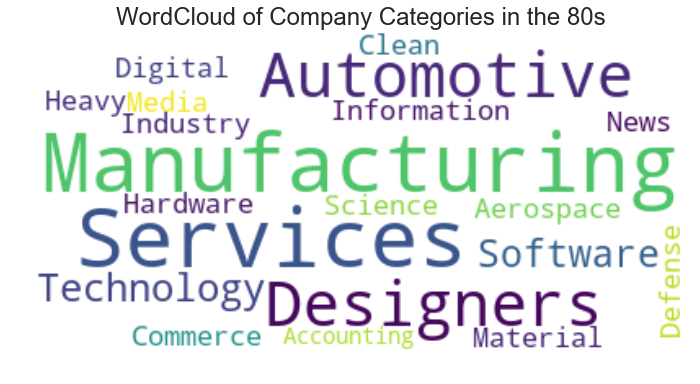

In [20]:
# Use function to plot WordCloud
plot_wordcloud('WordCloud of Company Categories in the 80s', 1980, 1990)

### Category WordCloud for 1990s

<strong>Top Categories:</strong> Software, Technology, Curated Web, Service, Internet

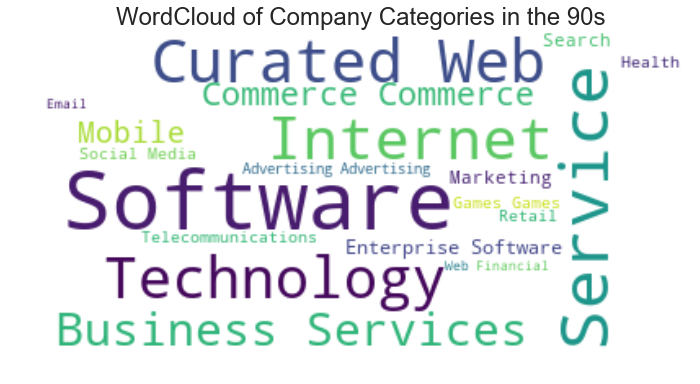

In [21]:
# Use function to plot WordCloud
plot_wordcloud('WordCloud of Company Categories in the 90s', 1990, 2000)

### Category WordCloud for 2000s

<strong>Top Categories:</strong> Software, Biotechnology, Enterprise Software, Mobile, Curated Web

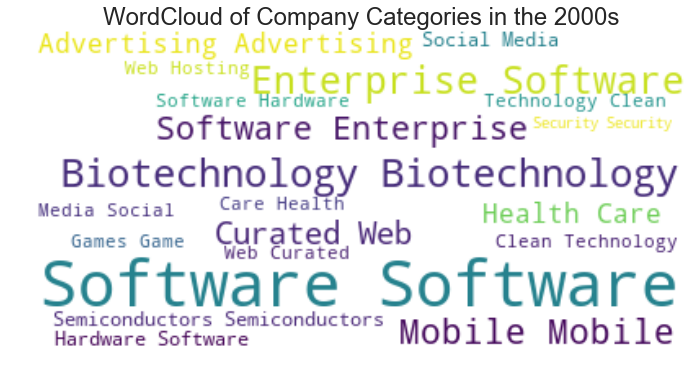

In [22]:
# Use function to plot WordCloud
plot_wordcloud('WordCloud of Company Categories in the 2000s', 2000, 2010)

### Category WordCloud for 2010s

<strong>Top Categories:</strong> Software, Enterprise Software, Mobile, Curated Web, Commerce, Social Media

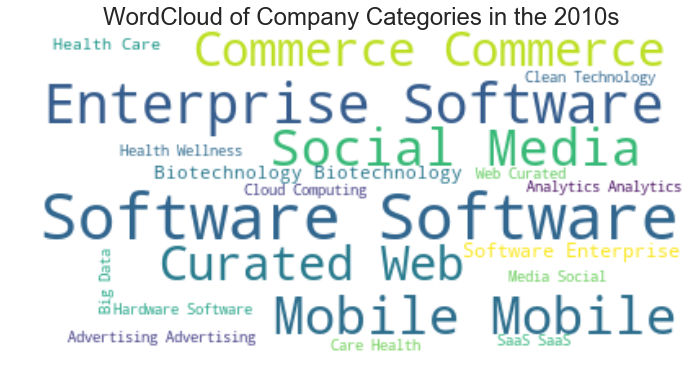

In [23]:
# Use function to plot WordCloud
plot_wordcloud('WordCloud of Company Categories in the 2010s', 2010, 2020)

## Observations: How has funded categories changed in the past 30 years?

Based on the initial look at the categories most common in each decade it seems that there is a clear shift towards technology starting in the 90s.  Top Categories by Decade are as follows:

<strong>1980s:</strong> Manufacturing, Services, Designers, Automotive, Technology

<strong>1990s:</strong> Software, Technology, Curated Web, Service, Internet

<strong>2000s:</strong> Software, Biotechnology, Enterprise Software, Mobile, Curated Web

<strong>2010s: </strong> Software, Enterprise Software, Mobile, Curated Web, Commerce, Social Media